# 2 자연어와 단어의 분산 표현

* 2.1 자연어 처리란?
* 2.2 시소러스
* 2.3 통계 기반 기법
* 2.4 통계 기반 기법 개선하기

## 2.1 자연어 처리란


자연어 처리(Natural Language Processing, NLP)는 인간의 언어를 이해하고 해석하는 일을 컴퓨터를 이용해서 수행하는 분야이다. 

자연어 처리는 음성 인식, 기계 번역, 질의 응답 시스템 등 다양한 응용 분야가 있다.

### 2.1.1 단어의 의미

자연어를 컴퓨터에게 이해시키기 위해서는 단어의 의미를 이해시켜야 한다. 단어의 의미를 이해시키기 위해서는 단어를 어떻게 표현하고 저장하느냐가 중요하다.

## 2.2 시소러스

시소러스(Thesaurus)는 유의어 사전으로, 단어의 관련성을 나타낸 정보를 가지고 있다. 

### 2.2.1 WordNet

WordNet은 프린스턴 대학교에서 만든 시소러스로, 시소러스의 대표적인 예이다.

WordNet은 유의어 사전으로, 유의어 집합인 시노님(synonym)을 연결하고, 상하위어(hypernym, hyponym) 등의 관계를 정의한다.

WordNet은 단어 네트워크로 구성되어 있으며, 단어 네트워크는 단어 간의 관계를 표현한다.

### 2.2.2 시소러스의 문제점

* 시대 변화에 대응하기 어렵다.
* 사람을 쓰는 비용이 크다.
* 단어의 미묘한 차이를 표현할 수 없다.

## 2.3 통계 기반 기법

통계 기반 기법은 말뭉치(corpus)를 이용하여 단어의 의미를 이해하는 방법이다.

> 자연어 처리에 사용되는 대량의 텍스트 데이터를 말뭉치라고 한다.
> 말뭉치에는 텍스트 데이터에 대한 추가 정보가 포함되는 경우가 있다.

### 2.3.1 파이썬으로 말뭉치 전처리하기

말뭉치를 이용하여 단어의 의미를 이해하기 위해서는 말뭉치를 전처리하는 과정이 필요하다.

유명한 말뭉치로는 위키백과, 구글 뉴스, 블로그, 트위터 등이 있다.

In [1]:
text = 'You say goodbye and i say hello.'

In [2]:
print(f"소문자로 변환: {text.lower()}")
print(f".사이에 띄어쓰기: {text.lower().replace('.', ' .')}")
print(f"띄어쓰기로 분할: {text.lower().replace('.', ' .').split( )}")

소문자로 변환: you say goodbye and i say hello.
.사이에 띄어쓰기: you say goodbye and i say hello .
띄어쓰기로 분할: ['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']


In [3]:
word_to_id = {}
id_to_word = {}

for word in text.lower().replace('.', ' .').split():
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id
    id_to_word[new_id] = word
    
print(f"단어 ID: {word_to_id}")
print(f"ID 단어: {id_to_word}")

단어 ID: {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
ID 단어: {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [4]:
# 단어 목록을 단어 ID 목록으로 변환
import numpy as np
corpus = [word_to_id[w] for w in text.lower().replace('.', ' .').split()]
corpus = np.array(corpus)
print(f"단어 ID 목록: {corpus}")

단어 ID 목록: [0 1 2 3 4 1 5 6]


In [5]:
def preprocess(text: str) -> tuple:
  """문장을 단어 ID 목록, 단어 ID 사전, ID 단어 사전으로 변환

  Args:
      text (str): 변환할 문장

  Returns:
      tuple: 단어 ID 목록, 단어 ID 사전, ID 단어 사전
  """
  text = text.lower()
  text = text.replace('.', ' .')
  words = text.split(' ')
  
  word_to_id = {}
  id_to_word = {}
  
  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word
      
  corpus = np.array([word_to_id[w] for w in words])
  
  return corpus, word_to_id, id_to_word

In [6]:
corpus, word_to_id, id_to_word = preprocess(text)
print(f"단어 ID 목록: {corpus}")
print(f"단어 ID: {word_to_id}")
print(f"ID 단어: {id_to_word}")

단어 ID 목록: [0 1 2 3 4 1 5 6]
단어 ID: {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
ID 단어: {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


### 2.3.2 단어의 분산 표현

단어의 분산 표현은 단어를 고정 길이의 밀집 벡터(dense vector)로 표현하는 방법이다.

**분산표현**

단어의 의미를 정확하게 파악할 수 있는 벡터 표현

### 2.3.3 분포 가설

분포 가설은 단어의 의미는 주변 단어에 의해 형성된다는 가설이다.

단어 자체에는 의미가 없고, 그 단어가 사용된 맥락이 의미를 형성한다는 것이다.

'맥락'은 특정 단어를 중심에 둔 그 주변 단어를 말한다.

'윈도우 크기'는 맥락의 크기를 말한다. 즉 윈도우 크기가 1이면 좌우 한 단어씩을 맥락으로 사용한다.

### 2.3.4 동시발생 행렬

동시발생 행렬은 맥락의 정보를 담고 있는 행렬이다.

**통계 기반 기법**

말뭉치를 사용하여 단어의 의미를 파악하는 방법

In [7]:
# 동시발생 행렬

def create_co_matrix(corpus: np.ndarray, vocab_size: int, window_size: int=1) -> np.ndarray:
  """동시발생 행렬 생성

  Args:
      corpus (np.ndarray): 단어 ID 목록
      vocab_size (int): 어휘 수
      window_size (int, optional): 윈도우 크기. Defaults to 1.

  Returns:
      np.ndarray: 동시발생 행렬
  """
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
  
  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size+1):
      left_idx = idx - i
      right_idx = idx + i
      
      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] += 1
        
      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] += 1
        
  return co_matrix

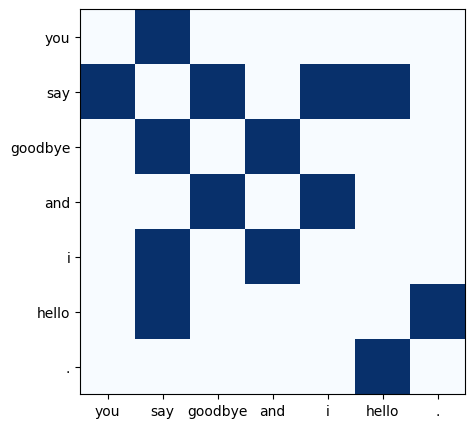

In [8]:
import matplotlib.pyplot as plt
vocab_size = len(word_to_id)
co_matrix = create_co_matrix(corpus, vocab_size)

# rendering
def render_co_matrix(co_matrix: np.ndarray, word_to_id: dict):
  plt.figure(figsize=(5, 5))
  plt.imshow(co_matrix, cmap='Blues', interpolation='none')
  plt.xticks(ticks=range(vocab_size), labels=list(word_to_id.keys()))
  plt.yticks(ticks=range(vocab_size), labels=list(word_to_id.keys()))
  plt.show()
  
render_co_matrix(co_matrix, word_to_id)

### 2.3.5 벡터 간 유사도

벡터 간 유사도는 벡터 사이의 유사도를 나타내는 척도이다.

벡터의 내적이나 유클리드 거리 등을 사용하여 벡터 간 유사도를 계산할 수 있다. 단 단어 벡터의 유사도를 계산할 때는 코사인 유사도를 주로 이용한다.

두 벡터$x = (x_1, x_2, \cdots, x_n)$, $y = (y_1, y_2, \cdots, y_n)$의 코사인 유사도는 다음과 같이 정의된다.

$$
similarity(x,y)=\frac{x \cdot y}{||x|| \cdot ||y||} = \frac{\sum_{i=1}^{n}x_iy_i}{\sqrt{\sum_{i=1}^{n}x_i^2}\sqrt{\sum_{i=1}^{n}y_i^2}}
$$

분자에는 벡터의 내적이, 분모에는 각 벡터의 노름(norm)이 들어간다.

노름은 벡터의 크기를 나타내는 것으로, $||x|| = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}$로 정의된다.

In [9]:
# 코사인 유사도 계산 함수
def cos_similarity(x ,y):
  nx = x / np.sqrt(np.sum(x**2))
  ny = y / np.sqrt(np.sum(y**2))
  return np.dot(nx, ny)

인수$x$와$y$는 넘파이 배열이라고 가정한다. 이 함수는 먼저 벡터 x와 y를 정규화 한 후 두 벡터의 내적을 계산한다.

In [10]:
# 0으로 나누기 방지
def cos_similarity(x, y, eps=1e-8):
  nx = x / (np.sqrt(np.sum(x**2)) + eps)
  ny = y / (np.sqrt(np.sum(y**2)) + eps)
  return np.dot(nx, ny)

In [11]:
# "you"와 "i"의 유사도 계산

you_id = word_to_id['you']
i_id = word_to_id['i']
print(f"you ID: {you_id}")
print(f"i ID: {i_id}")

you_vec = co_matrix[you_id]
i_vec = co_matrix[i_id]
print(f"you 벡터: {you_vec}")
print(f"i 벡터: {i_vec}")

print(f"you와 i의 유사도: {cos_similarity(you_vec, i_vec)}")

you ID: 0
i ID: 4
you 벡터: [0 1 0 0 0 0 0]
i 벡터: [0 1 0 1 0 0 0]
you와 i의 유사도: 0.7071067691154799


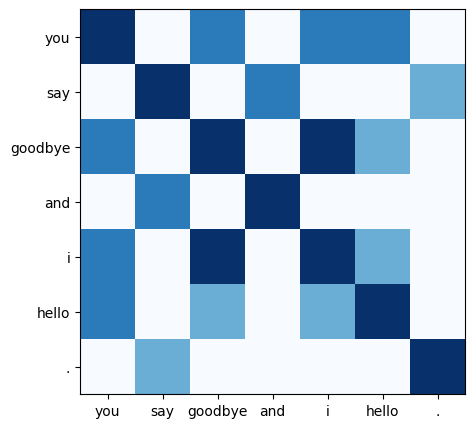

In [12]:
def culculate_similarity_matrix(co_matrix: np.ndarray) -> np.ndarray:
  """동시발생 행렬로부터 유사도 행렬 생성

  Args:
      co_matrix (np.ndarray): 동시발생 행렬

  Returns:
      np.ndarray: 유사도 행렬
  """
  similarity_matrix = np.zeros_like(co_matrix, dtype=np.float32)
  for i in range(len(co_matrix)):
    for j in range(len(co_matrix)):
      similarity_matrix[i, j] = cos_similarity(co_matrix[i], co_matrix[j])
  return similarity_matrix

similarity_matrix = culculate_similarity_matrix(co_matrix)
render_co_matrix(similarity_matrix, word_to_id)

### 2.3.6 유사 단어의 랭킹 표시

most similar 함수는 특정 단어에 대해 비슷한 단어를 유사도 순으로 출력한다.

In [13]:
def most_similar(query: str, word_to_id: dict, id_to_word: dict, word_matrix: np.ndarray, top: int=5):
  """유사 단어 검색

  Args:
      query (str): 검색어
      word_to_id (dict): 단어 ID 사전
      id_to_word (dict): ID 단어 사전
      word_matrix (np.ndarray): 단어 벡터 행렬
      top (int, optional): 상위 몇 개까지 출력할지. Defaults to 5.

  Returns:
      list: 유사 단어
  """
  if query not in word_to_id:
    print(f"{query}를 찾을 수 없습니다.")
    return
  
  print(f"\n[query] {query}")
  query_id = word_to_id[query]
  query_vec = word_matrix[query_id]
  
  # 코사인 유사도 계산
  vocab_size = len(id_to_word)
  similarity = np.zeros(vocab_size)
  for i in range(vocab_size):
    similarity[i] = cos_similarity(word_matrix[i], query_vec)
  
  # 유사도 기준으로 내림차순 출력
  count = 0
  for i in (-1 * similarity).argsort():
    if id_to_word[i] == query:
      continue
    print(f"{id_to_word[i]}: {similarity[i]}")
    
    count += 1
    if count >= top:
      return

In [14]:
text = 'You say goodbye and i say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
goodbye: 0.7071067691154799
i: 0.7071067691154799
hello: 0.7071067691154799
say: 0.0
and: 0.0


동시발행 행렬을 이용하면 단어를 벡터로 표현할 수 있다.

## 2.4 통계 기반 기법 개선하기

### 2.4.1 상호정보량

동시발행 행렬의 원소는 두 단어가 동시에 발행한 횟수를 나타낸다. 따라서 "the" 같은 불용어가 많이 등장하면 그 빈도수가 높아지는 문제가 있다.

이를 해결하기 위해 점별 상호정보량(Pointwise Mutual Information, PMI)라는 척도를 사용한다.

PMI는 두 확률변수가 동시에 일어날 확률과 각각이 일어날 확률의 곱의 로그값으로 정의된다.

$$
PMI(x,y) = \log_2\frac{P(x,y)}{P(x)P(y)}
$$

$P(x)$는 $x$가 일어날 확률, $P(y)$는 $y$가 일어날 확률, $P(x,y)$는 $x$와 $y$가 동시에 일어날 확률을 나타낸다.

이 식을 자연어 예에 적용하면 $P(x)$는 단어$x$가 말뭉치에서 등장하는 확률, $P(y)$는 단어$y$가 말뭉치에서 등장하는 확률, $P(x,y)$는 단어$x$와$y$가 동시에 등장하는 확률을 나타낸다.

10,000개의 단어로 이루어진 말뭉치에서 "the"가 1,000번 등장하고, "car"가 20번 등장한다면 $P(the)=0.1$, $P(car)=0.002$이다.

$$
PMI(x,y) = log_{2}\frac{P(x,y)}{P(x)P(y)}=log_{2}\frac{\frac{C(x,y)}{N}}{\frac{C(x)}{N}\frac{C(y)}{N}}=log_{2}\frac{C(x,y)N}{C(x)C(y)}
$$

* 말뭉치의 단어 수(N)를 10,000이라고 가정
* "the"와 "car"와 "drive"가 각각 1000, 20, 10번 등장한다,* 그리고
* "the"와 "car"가 동시에 10번 등장한다. 
* "car"와 "drive"가 동시에 5번 등장한다.

$$
PMI(the,car) = log_{2}\frac{10 \times 10000}{1000 \times 20} = ?
$$
$$
PMI(car,drive) = log_{2}\frac{5 \times 10000}{20 \times 10} = ?
$$

"car"는 "the"보다 "drive"와 더 관련이 강해진다. 이는 단어가 단독으로 출현하는 횟수가 고려 되었기 때문이다.

"the"가 자주 출현했으므로 PMI 점수가 낮아진다.

**양의 상호정보량(Positive PMI, PPMI)**
$$
PPMI(x,y) = max(0,PMI(x,y))
$$

PMI가 음수일 때는 0으로 취급하는 방법이다.

In [15]:
def ppmi(C, verbose=False, eps=1e-8):
  M = np.zeros_like(C, dtype=np.float32)
  N = np.sum(C)
  S = np.sum(C, axis=0)
  total = C.shape[0] * C.shape[1]
  cnt = 0
  
  for i in range(C.shape[0]):
    for j in range(C.shape[1]):
      pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
      M[i, j] = max(0, pmi)
      
      if verbose:
        cnt += 1
        if cnt % (total//100) == 0:
          print(f"{100*cnt/total:.1f}% 완료" % (100*cnt/total))
  return M

인수 C는 동시발생 행렬, verbose는 진행상황 출력 여부를 나타낸다.

단어 $x$와 $y$의 동시발생 횟수를 $C(x,y)$, 단어 $x$의 출현 횟수를 $C(x)$, 단어 $y$의 출현 횟수를 $C(y)$라고 하면, PPMI는 다음과 같이 정의된다.
$$
PPMI(x,y) = max(0,log_{2}\frac{C(x,y)N}{C(x)C(y)})
$$

In [16]:
text = 'You say goodbye and i say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3) # 유효 자릿수를 세 자리로 표시
print(f"동시발생 행렬")
print(C)
print('-'*50)
print(f"\nPPMI")
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------

PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


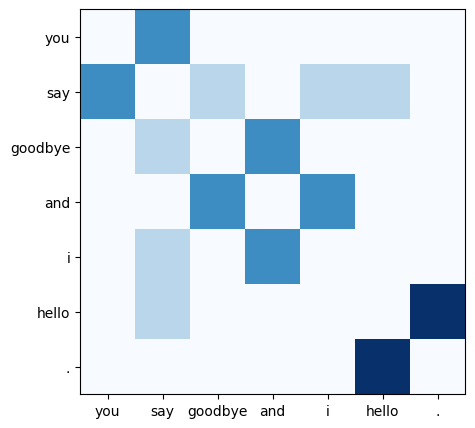

In [17]:
# render PPMI
render_co_matrix(W, word_to_id)

### 2.4.2 차원 감소

*차원 감소(dimensionality reduction)*는 말뭉치의 단어 수를 줄이는 방법이다. (중요한 정보는 최대한 유지하면서)


**특잇값 분해(Singular Value Decomposition, SVD)**

SVD는 임의의 행렬을 세 행렬의 곱으로 분해하는 방법이다.
$$
X = USV^T
$$

$X$는 $N \times M$ 행렬, $U$는 $N \times N$ 직교행렬, $S$는 $N \times M$ 직사각 대각행렬, $V$는 $M \times M$ 직교행렬이다.

$U$와 $V$는 직교행렬이므로, $U^TU=I$, $V^TV=I$이다.

$S$의 대각성분이 특잇값이며, 특잇값은 내림차순으로 정렬되어 있다.

$S$의 대각성분 중 상위 $r$개만 남기고 나머지는 0으로 채워서 $S'$를 만든다.

$$
S' = \begin{pmatrix}
\sigma_1 & 0 & \cdots & 0 \\
0 & \sigma_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma_r \\
0 & 0 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0 \\
\end{pmatrix}
$$

### 2.4.3 SVG에 의한 차원 감소

In [19]:
text = 'You say goodbye and i say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

print(f"\n동시발생 행렬")
print(C[0])

print(f"\nPPMI")
print(W[0])

print(f"\nSVD")
print(U[0])


동시발생 행렬
[0 1 0 0 0 0 0]

PPMI
[0.    1.807 0.    0.    0.    0.    0.   ]

SVD
[-3.409e-01 -1.110e-16 -3.886e-16 -1.205e-01  0.000e+00  9.323e-01
  2.226e-16]


In [20]:
# 2차원으로 축소
print(f"\nSVD 2차원")
print(U[0, :2])


SVD 2차원
[-3.409e-01 -1.110e-16]


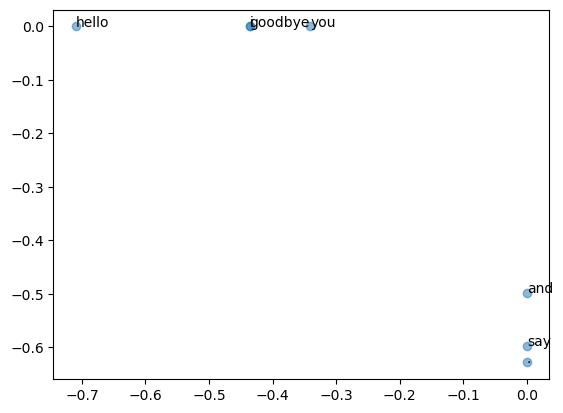

In [21]:
for word, word_id in word_to_id.items():
  plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:, 0], U[:, 1], alpha=0.5)
plt.show()

그림을 보면 "goodbye"와 "hello", "you"와 "i"가 가까이 있음을 알 수 있다.

### 2.4.4 PTB 데이터셋

펜 트리뱅크(Penn Treebank, PTB)는 주어진 문장을 구문 분석하는 트리 구조로 되어 있는 데이터셋이다.

PTB 말뭉치는 word2vec의 발명자 토마스 미코로프의 웹페이지에서 다운로드할 수 있다.

In [25]:
import sys
sys.path.append('..')
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
print(f"말뭉치 크기: {len(corpus)}")
print(f"corpus[:30]: {corpus[:30]}")
print("-"*100)
print(f"id_to_word[0]: {id_to_word[0]}")
print(f"id_to_word[1]: {id_to_word[1]}")
print(f"id_to_word[2]: {id_to_word[2]}")
print("-"*100)
print(f"word_to_id['car']: {word_to_id['car']}")
print(f"word_to_id['happy']: {word_to_id['happy']}")
print(f"word_to_id['lexus']: {word_to_id['lexus']}")

말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
----------------------------------------------------------------------------------------------------
id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz
----------------------------------------------------------------------------------------------------
word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


### 2.4.5 PTB 데이터셋 평가

PTB 데이터셋에 통계 기반 기법을 적용한다. 이번에는 큰 행렬에 SVD를 적용해 차원을 감소시킨다.

In [29]:
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ... ')
W = ppmi(C)

print('SVD 계산 ... ')
try: 
  from sklearn.utils.extmath import randomized_svd
  U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)
except ImportError:
  U, S, V = np.linalg.svd(W)
  
word_vecs = U[:, :wordvec_size]
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
  most_similar(query, word_to_id, id_to_word, word_vecs, top=5)
  

PPMI 계산 ... 
SVD 계산 ... 

[query] you
 i: 0.6847985982894897
 we: 0.639617383480072
 do: 0.5899771451950073
 anybody: 0.5426907539367676
 'll: 0.5313369631767273

[query] year
 quarter: 0.6507624983787537
 month: 0.6260066628456116
 fiscal: 0.5701863169670105
 earlier: 0.569119930267334
 third: 0.5684657096862793

[query] car
 auto: 0.6192052364349365
 luxury: 0.569644033908844
 cars: 0.4744391441345215
 corsica: 0.4675040543079376
 vehicle: 0.43756982684135437

[query] toyota
 motor: 0.7409532070159912
 nissan: 0.673519492149353
 motors: 0.6221210360527039
 honda: 0.6133593320846558
 mazda: 0.5579687356948853
